In [1]:
import pandas as pd
import seaborn as sns

In [2]:
titanic_data = pd.read_csv("train.csv")

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 12)

Getting the total number of NaNs for each column to determine whether or not I will keep them. 

In [5]:
#getting total number of NaNs for each column
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As Cabin has a large number of NaNs (close to the total number of rows for the entire dataset. Also, seeing as Passenger ID and Ticket does not really indicate anything useful to us, dropping these 

In [6]:
# don't need the passenger ID column
titanic_data.drop(['PassengerId','Ticket'], axis = 1, inplace = True)

In [7]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


With a large amount of NaNs in the cabin column, going to investigate and see if there is a potential solution here. 

In [8]:
titanic_data[titanic_data.Cabin.isnull()].Pclass.value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

In [9]:
titanic_data[titanic_data.Cabin.notnull()].Pclass.value_counts()

1    176
2     16
3     12
Name: Pclass, dtype: int64

In [10]:
titanic_data[titanic_data.Cabin.isnull()].Sex.value_counts()

male      470
female    217
Name: Sex, dtype: int64

In [11]:
titanic_data[titanic_data.Cabin.notnull()].Sex.value_counts()

male      107
female     97
Name: Sex, dtype: int64

In [12]:
set(titanic_data[titanic_data.Cabin.notnull()].Cabin)

{'A10',
 'A14',
 'A16',
 'A19',
 'A20',
 'A23',
 'A24',
 'A26',
 'A31',
 'A32',
 'A34',
 'A36',
 'A5',
 'A6',
 'A7',
 'B101',
 'B102',
 'B18',
 'B19',
 'B20',
 'B22',
 'B28',
 'B3',
 'B30',
 'B35',
 'B37',
 'B38',
 'B39',
 'B4',
 'B41',
 'B42',
 'B49',
 'B5',
 'B50',
 'B51 B53 B55',
 'B57 B59 B63 B66',
 'B58 B60',
 'B69',
 'B71',
 'B73',
 'B77',
 'B78',
 'B79',
 'B80',
 'B82 B84',
 'B86',
 'B94',
 'B96 B98',
 'C101',
 'C103',
 'C104',
 'C106',
 'C110',
 'C111',
 'C118',
 'C123',
 'C124',
 'C125',
 'C126',
 'C128',
 'C148',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C30',
 'C32',
 'C45',
 'C46',
 'C47',
 'C49',
 'C50',
 'C52',
 'C54',
 'C62 C64',
 'C65',
 'C68',
 'C7',
 'C70',
 'C78',
 'C82',
 'C83',
 'C85',
 'C86',
 'C87',
 'C90',
 'C91',
 'C92',
 'C93',
 'C95',
 'C99',
 'D',
 'D10 D12',
 'D11',
 'D15',
 'D17',
 'D19',
 'D20',
 'D21',
 'D26',
 'D28',
 'D30',
 'D33',
 'D35',
 'D36',
 'D37',
 'D45',
 'D46',
 'D47',
 'D48',
 'D49',
 'D50',
 'D56',
 'D6',
 'D7',
 'D9',
 'E10',
 'E101',
 'E12',
 

All of the cabins typically contain one cabin code, whereas other contain two. If they contain two or more, the floors are situated closely together. Creating a new column that takes the first letter of the titanic_data.cabin column

In [13]:
titanic_data['Cabin'] = titanic_data['Cabin'].str[0]

In [14]:
set(titanic_data.Cabin)

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan}

The people who do not have a cabin are more likely to be third class. Interestingly it seems that those who do have a cabin number are almost all first class.  Going to lump the cabins together in a new column. 

In [15]:
def cabinclass(Cabin):
    if Cabin == 'A' or Cabin == 'B' or Cabin == 'C':
        return 1
    elif Cabin == 'D' or Cabin == 'E' or Cabin == 'F':
        return 2
    else:
        return 3

In [16]:
Cabin = [ cabinclass(Cabin) for Cabin in titanic_data.Cabin]

In [17]:
titanic_data['CabinLevel'] = Cabin

In [18]:
titanic_data.CabinLevel.head()

0    3
1    1
2    3
3    1
4    3
Name: CabinLevel, dtype: int64

In [19]:
titanic_data.drop(['Cabin'], axis = 1, inplace = True)

In [20]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLevel
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,3


In [21]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,CabinLevel
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,2.640853
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.708752
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,3.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,3.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,3.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


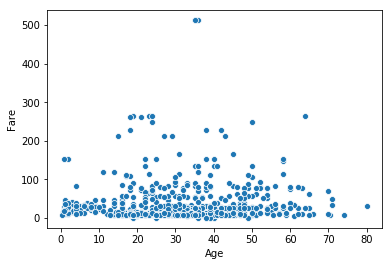

In [22]:
sns.scatterplot(x = 'Age', y = 'Fare', data = titanic_data)

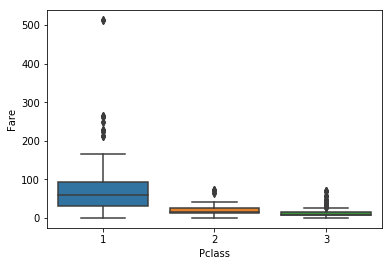

In [23]:
sns.boxplot(x ='Pclass', y = 'Fare', data = titanic_data)

In [24]:
titanic_data[titanic_data.Fare>100].Survived.value_counts()

1    39
0    14
Name: Survived, dtype: int64

In [25]:
titanic_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [26]:
39/(39+14), 342/(549+342)

(0.7358490566037735, 0.3838383838383838)

It seems that for the first class, there are a number of outliers, more extreme than those of the second or third class.  It is also apparent that most did not pay over $100 for their ticket.  Going to create a third class to pull out these extremely high spenders. These extremely high spenders have a significantly higher chance of living and thus, going to create a fourth class. 

In [27]:
def newpclass(Fare,Pclass):
    i = 0
    baller = [0]*len(Fare)
    for i in range(len(Fare)):
        if Fare[i] > 100:
            baller[i] = 4
        else:
            baller[i] = Pclass[i]
    return baller

In [28]:
newpclass = [newpclass(titanic_data.Fare,titanic_data.Pclass)]

In [29]:
newpclass = newpclass[0]

In [30]:
titanic_data['UpdatedPclass'] = newpclass

In [31]:
titanic_data.drop('Pclass', axis = 1, inplace = True)

In [32]:
titanic_data.head()

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLevel,UpdatedPclass
0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,3,3
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,1
2,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,3,3
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,1
4,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,3,3


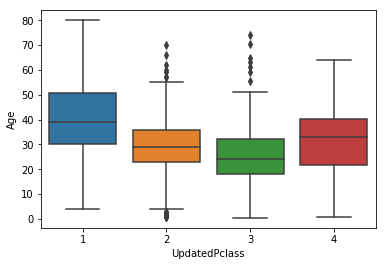

In [33]:
sns.boxplot( x = 'UpdatedPclass', y = 'Age', data = titanic_data)

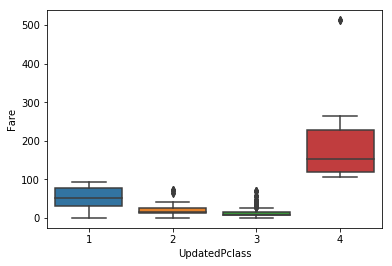

In [34]:
sns.boxplot(x ='UpdatedPclass', y = 'Fare', data = titanic_data)

Now going to deal with the missing Age data, going to do some exploratory analysis to see what numbers we should input for the missing values

In [35]:
titanic_data[titanic_data.Age.isnull()].UpdatedPclass.value_counts()

3    136
1     25
2     11
4      5
Name: UpdatedPclass, dtype: int64

In [36]:
titanic_data[titanic_data.Age.isnull()].Sex.value_counts()

male      124
female     53
Name: Sex, dtype: int64

In [37]:
136/(136+25+16), 124/(124+53)

(0.768361581920904, 0.7005649717514124)

It seems that most of those who do not have an age are in the third clas and are likely to be male.  Thus going to see what is the median age is of those who are in the third pclass and are male. 

In [38]:
titanic_data[(titanic_data.Sex == 'male') & (titanic_data.UpdatedPclass == 3)].describe()

,Survived,Age,SibSp,Parch,Fare,CabinLevel,UpdatedPclass
count,347.000000,253.000000,347.000000,347.000000,347.000000,347.000000,347.0
mean,0.135447,26.507589,0.498559,0.224784,12.661633,2.982709,3.0
std,0.342694,12.159514,1.288846,0.623404,11.681696,0.130542,0.0
min,0.000000,0.420000,0.000000,0.000000,0.000000,2.000000,3.0
25%,0.000000,20.000000,0.000000,0.000000,7.750000,3.000000,3.0
50%,0.000000,25.000000,0.000000,0.000000,7.925000,3.000000,3.0
75%,0.000000,33.000000,0.000000,0.000000,10.008300,3.000000,3.0
max,1.000000,74.000000,8.000000,5.000000,69.550000,3.000000,3.0


In [39]:
titanic_data[(titanic_data.Sex == 'male') & (titanic_data.UpdatedPclass == 3)].median()

Survived          0.000
Age              25.000
SibSp             0.000
Parch             0.000
Fare              7.925
CabinLevel        3.000
UpdatedPclass     3.000
dtype: float64

In [40]:
titanic_data.Age.fillna(26.507589, inplace = True)

Going to engineer more of the features here

In [41]:
def sexbinary(x):
    if x == "male":
        return 0
    else:
        return 1

In [42]:
sex_category = [sexbinary(x) for x in titanic_data.Sex]

In [43]:
titanic_data['sex_binary'] = sex_category

Going to see the pattern of early age and survival to determine a good cutoff for young versus old. 

In [44]:
titanic_data[titanic_data.Age < 12].Survived.value_counts()

1    39
0    29
Name: Survived, dtype: int64

In [45]:
titanic_data[titanic_data.Age < 16].Survived.value_counts()

1    49
0    34
Name: Survived, dtype: int64

In [46]:
titanic_data[titanic_data.Age < 17].Survived.value_counts()

1    55
0    45
Name: Survived, dtype: int64

In [47]:
39/(39+29), 49/(34+49), 55/(55+45)

(0.5735294117647058, 0.5903614457831325, 0.55)

After doing some quick exploratory analysis, it is easy to determine that there is a drop off in survival starting at around age 16

In [48]:
def ischild(Age):
    if Age < 16:
        return 1
    else:
        return 0

In [49]:
child = [ischild(Age) for Age in titanic_data.Age]

In [50]:
titanic_data['IsChild'] = child

Another piece of analysis is determing whether or not having some sort of family (or being alone) impacts survival. Unfortunately the SibSp and Parch don't really allow for more interesting analysis (having a wife versus not etc). After grouping these together we can clearly see the survival rates for each as being different, analysis below:

In [51]:
titanic_data['TotalFamily'] = titanic_data.SibSp + titanic_data.Parch

In [52]:
def isalone(TotalFamily):
    if TotalFamily > 0:
        return 0
    else:
        return 1

In [53]:
titanic_data['IsAlone'] = [isalone(TotalFamily) for TotalFamily in titanic_data.TotalFamily]

In [54]:
titanic_data[titanic_data.IsAlone == 1].Survived.value_counts()

0    374
1    163
Name: Survived, dtype: int64

In [55]:
titanic_data[titanic_data.IsAlone == 0].Survived.value_counts()

1    179
0    175
Name: Survived, dtype: int64

In [56]:
163/(163+374), 179/(179+175)

(0.30353817504655495, 0.5056497175141242)

In [57]:
set(titanic_data['Embarked'])

{'C', 'Q', 'S', nan}

In [58]:
titanic_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

As most of those on the titanic departed from S, going to fill in the two missing with S. 

In [59]:
titanic_data.Embarked.fillna('S', inplace = True)

In [60]:
def embarked(Embarked):
    if Embarked == 'C':
        return 0
    elif Embarked == 'Q':
        return 1
    elif Embarked == 'S':
        return 2
    else:
        return 'NaN'

In [61]:
Embarked = [embarked(Embarked) for Embarked in titanic_data.Embarked]

In [62]:
titanic_data['EmbarkedNumerical'] = Embarked

In [63]:
titanic_data.head()

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLevel,UpdatedPclass,sex_binary,IsChild,TotalFamily,IsAlone,EmbarkedNumerical
0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,3,3,0,0,1,0,2
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,1,1,0,1,0,0
2,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,3,3,1,0,0,1,2
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,1,1,0,1,0,2
4,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,3,3,0,0,0,1,2


In [64]:
titanic_data.drop(['Name','Embarked','Sex','SibSp','Parch'], axis = 1, inplace = True)

In [65]:
titanic_data.isna().sum()

Survived             0
Age                  0
Fare                 0
CabinLevel           0
UpdatedPclass        0
sex_binary           0
IsChild              0
TotalFamily          0
IsAlone              0
EmbarkedNumerical    0
dtype: int64

In [66]:
titanic_data.drop('Age', axis = 1, inplace = True)

In [67]:
titanic_data.head()

,Survived,Fare,CabinLevel,UpdatedPclass,sex_binary,IsChild,TotalFamily,IsAlone,EmbarkedNumerical
0,0,7.2500,3,3,0,0,1,0,2
1,1,71.2833,1,1,1,0,1,0,0
2,1,7.9250,3,3,1,0,0,1,2
3,1,53.1000,1,1,1,0,1,0,2
4,0,8.0500,3,3,0,0,0,1,2


After running the models, going to see if I can engineer another feature by combining the sex of the person as well as how old they are. The categories are male child, female child, male adult, female adult. 

In [68]:
def genderchild(sex_binary, IsChild):
    i = 0 
    genderchild = [0]*len(sex_binary)
    
    for i in range(len(sex_binary)):
        if sex_binary[i] == 0 and IsChild[i] == 1:
            genderchild[i] = 0
            
        elif sex_binary[i] == 0 and IsChild[i] == 0:
            genderchild[i] = 1
            
        elif sex_binary[i] == 1 and IsChild[i] == 1:
            genderchild[i] = 2
            
        else:
            genderchild[i] = 3
    
    return genderchild

In [69]:
genderchild = [genderchild(titanic_data.sex_binary,titanic_data.IsChild)]

In [70]:
genderchild = genderchild[0]

In [71]:
set(genderchild)

{0, 1, 2, 3}

In [72]:
titanic_data['genderchild'] = genderchild

In [73]:
titanic_data.head(15)

,Survived,Fare,CabinLevel,UpdatedPclass,sex_binary,IsChild,TotalFamily,IsAlone,EmbarkedNumerical,genderchild
0,0,7.2500,3,3,0,0,1,0,2,1
1,1,71.2833,1,1,1,0,1,0,0,3
2,1,7.9250,3,3,1,0,0,1,2,3
3,1,53.1000,1,1,1,0,1,0,2,3
4,0,8.0500,3,3,0,0,0,1,2,1
5,0,8.4583,3,3,0,0,0,1,1,1
6,0,51.8625,2,1,0,0,0,1,2,1
7,0,21.0750,3,3,0,1,4,0,2,0
8,1,11.1333,3,3,1,0,2,0,2,3
9,1,30.0708,3,2,1,1,1,0,0,2


In [74]:
titanic_data.drop('TotalFamily',axis = 1, inplace = True)

# Importing the Holdout Set

In [99]:
titanic_holdout = pd.read_csv("holdout_test.csv")

In [103]:
titanic_holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [102]:
titanic_holdout.drop('Survived', axis = 1, inplace = True)

In [104]:
titanic_holdout.shape

(418, 11)

Getting the total number of NaNs for each column to determine whether or not I will keep them. 

In [105]:
#getting total number of NaNs for each column
titanic_holdout.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

As Cabin has a large number of NaNs (close to the total number of rows for the entire dataset. Also, seeing as Passenger ID and Ticket does not really indicate anything useful to us, dropping these 

In [106]:
# don't need the passenger ID column
titanic_data.drop(['Ticket'], axis = 1, inplace = True)

KeyError: "['Ticket'] not found in axis"

In [108]:
titanic_holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [109]:
titanic_holdout[titanic_holdout.Cabin.isnull()].Pclass.value_counts()

3    214
2     86
1     27
Name: Pclass, dtype: int64

In [110]:
titanic_holdout[titanic_holdout.notnull()].Pclass.value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [112]:
titanic_holdout[titanic_holdout.Cabin.isnull()].Sex.value_counts()

male      219
female    108
Name: Sex, dtype: int64

In [113]:
titanic_holdout[titanic_holdout.Cabin.notnull()].Sex.value_counts()

male      47
female    44
Name: Sex, dtype: int64

In [114]:
set(titanic_holdout[titanic_holdout.Cabin.notnull()].Cabin)

{'A11',
 'A18',
 'A21',
 'A29',
 'A34',
 'A9',
 'B10',
 'B11',
 'B24',
 'B26',
 'B36',
 'B41',
 'B45',
 'B51 B53 B55',
 'B52 B54 B56',
 'B57 B59 B63 B66',
 'B58 B60',
 'B61',
 'B69',
 'B71',
 'B78',
 'C101',
 'C105',
 'C106',
 'C116',
 'C130',
 'C132',
 'C22 C26',
 'C23 C25 C27',
 'C28',
 'C31',
 'C32',
 'C39',
 'C46',
 'C51',
 'C53',
 'C54',
 'C55 C57',
 'C6',
 'C62 C64',
 'C7',
 'C78',
 'C80',
 'C85',
 'C86',
 'C89',
 'C97',
 'D',
 'D10 D12',
 'D15',
 'D19',
 'D21',
 'D22',
 'D28',
 'D30',
 'D34',
 'D37',
 'D38',
 'D40',
 'D43',
 'E31',
 'E34',
 'E39 E41',
 'E45',
 'E46',
 'E50',
 'E52',
 'E60',
 'F',
 'F E46',
 'F E57',
 'F G63',
 'F2',
 'F33',
 'F4',
 'G6'}

All of the cabins typically contain one cabin code, whereas other contain two. If they contain two or more, the floors are situated closely together. Creating a new column that takes the first letter of the titanic_data.cabin column. This seems to be the case for the holdout set as well. 

In [115]:
titanic_holdout['Cabin'] = titanic_holdout['Cabin'].str[0]

In [116]:
set(titanic_holdout.Cabin)

{'A', 'B', 'C', 'D', 'E', 'F', 'G', nan}

The people who do not have a cabin are more likely to be third class. Interestingly it seems that those who do have a cabin number are almost all first class.  Going to lump the cabins together in a new column. 

In [117]:
def cabinclass(Cabin):
    if Cabin == 'A' or Cabin == 'B' or Cabin == 'C':
        return 1
    elif Cabin == 'D' or Cabin == 'E' or Cabin == 'F':
        return 2
    else:
        return 3

In [118]:
Cabin = [ cabinclass(Cabin) for Cabin in titanic_holdout.Cabin]

In [119]:
titanic_holdout['CabinLevel'] = Cabin

In [120]:
titanic_holdout.CabinLevel.head()

0    3
1    3
2    3
3    3
4    3
Name: CabinLevel, dtype: int64

In [121]:
titanic_holdout.drop(['Cabin'], axis = 1, inplace = True)

In [123]:
titanic_holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinLevel
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,3
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3


In [124]:
titanic_holdout.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,CabinLevel
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,2.641148
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.719999
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,3.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,3.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,3.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,3.000000


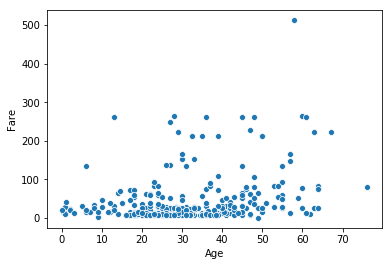

In [125]:
sns.scatterplot(x = 'Age', y = 'Fare', data = titanic_holdout)

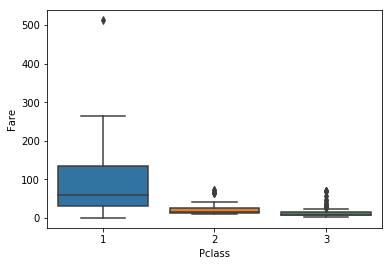

In [126]:
sns.boxplot(x ='Pclass', y = 'Fare', data = titanic_holdout)

It seems that for the first class, there are a number of outliers, more extreme than those of the second or third class.  It is also apparent that most did not pay over $100 for their ticket.  Going to create a third class to pull out these extremely high spenders. These extremely high spenders have a significantly higher chance of living and thus, going to create a fourth class. The same is true for the holdout set. 

In [128]:
def newpclass(Fare,Pclass):
    i = 0
    baller = [0]*len(Fare)
    for i in range(len(Fare)):
        if Fare[i] > 100:
            baller[i] = 4
        else:
            baller[i] = Pclass[i]
    return baller

In [129]:
newpclass = [newpclass(titanic_holdout.Fare,titanic_holdout.Pclass)]

In [130]:
newpclass = newpclass[0]

In [131]:
titanic_holdout['UpdatedPclass'] = newpclass

In [132]:
titanic_holdout.drop('Pclass', axis = 1, inplace = True)

In [133]:
titanic_holdout.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinLevel,UpdatedPclass
0,892,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,3,3
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,3,3
2,894,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,3,2
3,895,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,3,3
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3,3


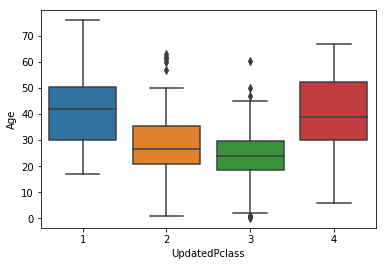

In [134]:
sns.boxplot( x = 'UpdatedPclass', y = 'Age', data = titanic_holdout)

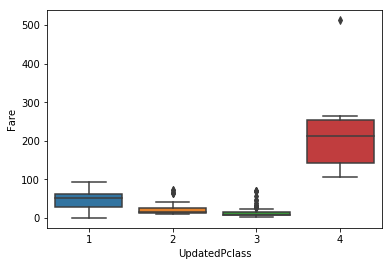

In [135]:
sns.boxplot(x ='UpdatedPclass', y = 'Fare', data = titanic_holdout)

Now going to deal with the missing Age data, going to do some exploratory analysis to see what numbers we should input for the missing values

In [136]:
titanic_holdout[titanic_holdout.Age.isnull()].UpdatedPclass.value_counts()

3    72
1     9
2     5
Name: UpdatedPclass, dtype: int64

In [137]:
titanic_holdout[titanic_holdout.Age.isnull()].Sex.value_counts()

male      61
female    25
Name: Sex, dtype: int64

In [138]:
72/(72+9+5), 61/(61+25)

(0.8372093023255814, 0.7093023255813954)

It seems that most of those who do not have an age are in the third clas and are likely to be male.  Thus going to see what is the median age is of those who are in the third pclass and are male. This hold true for the holdout set as well

In [139]:
titanic_holdout[(titanic_holdout.Sex == 'male') & (titanic_holdout.UpdatedPclass == 3)].describe()

,PassengerId,Age,SibSp,Parch,Fare,CabinLevel,UpdatedPclass
count,146.000000,96.000000,146.000000,146.000000,145.000000,146.000000,146.0
mean,1098.349315,24.525104,0.404110,0.328767,11.826350,2.979452,3.0
std,118.293416,10.240251,1.034433,1.083478,10.200631,0.142354,0.0
min,892.000000,0.330000,0.000000,0.000000,3.170800,2.000000,3.0
25%,998.250000,20.000000,0.000000,0.000000,7.750000,3.000000,3.0
50%,1102.500000,24.000000,0.000000,0.000000,7.895800,3.000000,3.0
75%,1191.750000,29.500000,0.000000,0.000000,9.500000,3.000000,3.0
max,1309.000000,60.500000,8.000000,9.000000,69.550000,3.000000,3.0


In [140]:
titanic_holdout[(titanic_holdout.Sex == 'male') & (titanic_holdout.UpdatedPclass == 3)].median()

PassengerId      1102.5000
Age                24.0000
SibSp               0.0000
Parch               0.0000
Fare                7.8958
CabinLevel          3.0000
UpdatedPclass       3.0000
dtype: float64

In [141]:
titanic_holdout.Age.fillna(24.525104, inplace = True)

Going to engineer more of the features here

In [142]:
def sexbinary(x):
    if x == "male":
        return 0
    else:
        return 1

In [143]:
sex_category = [sexbinary(x) for x in titanic_holdout.Sex]

In [144]:
titanic_holdout['sex_binary'] = sex_category

Going to see the pattern of early age and survival to determine a good cutoff for young versus old. 

After doing some quick exploratory analysis, it is easy to determine that there is a drop off in survival starting at around age 16. Assuming this holds true for the holdout set too. 

In [146]:
def ischild(Age):
    if Age < 16:
        return 1
    else:
        return 0

In [147]:
child = [ischild(Age) for Age in titanic_holdout.Age]

In [148]:
titanic_holdout['IsChild'] = child

Another piece of analysis is determing whether or not having some sort of family (or being alone) impacts survival. Unfortunately the SibSp and Parch don't really allow for more interesting analysis (having a wife versus not etc). After grouping these together we can clearly see the survival rates for each as being different, analysis below (again, assuming the analysis done orignally holds true and so bucketing makes sense)

In [149]:
titanic_holdout['TotalFamily'] = titanic_holdout.SibSp + titanic_holdout.Parch

In [150]:
def isalone(TotalFamily):
    if TotalFamily > 0:
        return 0
    else:
        return 1

In [151]:
titanic_holdout['IsAlone'] = [isalone(TotalFamily) for TotalFamily in titanic_holdout.TotalFamily]

In [152]:
set(titanic_holdout['Embarked'])

{'C', 'Q', 'S'}

In [153]:
titanic_holdout.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

As most of those on the titanic departed from S, going to fill in the two missing with S. Same holds true for this holdout set as in the original data set. 

In [154]:
titanic_holdout.Embarked.fillna('S', inplace = True)

In [155]:
def embarked(Embarked):
    if Embarked == 'C':
        return 0
    elif Embarked == 'Q':
        return 1
    elif Embarked == 'S':
        return 2
    else:
        return 'NaN'

In [156]:
Embarked = [embarked(Embarked) for Embarked in titanic_holdout.Embarked]

In [157]:
titanic_holdout['EmbarkedNumerical'] = Embarked

In [158]:
titanic_holdout.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinLevel,UpdatedPclass,sex_binary,IsChild,TotalFamily,IsAlone,EmbarkedNumerical
0,892,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,3,3,0,0,0,1,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,3,3,1,0,1,0,2
2,894,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,3,2,0,0,0,1,1
3,895,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,3,3,0,0,0,1,2
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3,3,1,0,2,0,2


In [159]:
titanic_holdout.drop(['Name','Embarked','Sex','SibSp','Parch'], axis = 1, inplace = True)

In [160]:
titanic_holdout.isna().sum()

PassengerId          0
Age                  0
Ticket               0
Fare                 1
CabinLevel           0
UpdatedPclass        0
sex_binary           0
IsChild              0
TotalFamily          0
IsAlone              0
EmbarkedNumerical    0
dtype: int64

In [161]:
titanic_holdout.drop('Age', axis = 1, inplace = True)

In [162]:
titanic_holdout.head()

,PassengerId,Ticket,Fare,CabinLevel,UpdatedPclass,sex_binary,IsChild,TotalFamily,IsAlone,EmbarkedNumerical
0,892,330911,7.8292,3,3,0,0,0,1,1
1,893,363272,7.0000,3,3,1,0,1,0,2
2,894,240276,9.6875,3,2,0,0,0,1,1
3,895,315154,8.6625,3,3,0,0,0,1,2
4,896,3101298,12.2875,3,3,1,0,2,0,2


After running the models, going to see if I can engineer another feature by combining the sex of the person as well as how old they are. The categories are male child, female child, male adult, female adult. 

In [163]:
def genderchild(sex_binary, IsChild):
    i = 0 
    genderchild = [0]*len(sex_binary)
    
    for i in range(len(sex_binary)):
        if sex_binary[i] == 0 and IsChild[i] == 1:
            genderchild[i] = 0
            
        elif sex_binary[i] == 0 and IsChild[i] == 0:
            genderchild[i] = 1
            
        elif sex_binary[i] == 1 and IsChild[i] == 1:
            genderchild[i] = 2
            
        else:
            genderchild[i] = 3
    
    return genderchild

In [165]:
genderchild = [genderchild(titanic_holdout.sex_binary,titanic_holdout.IsChild)]

In [166]:
genderchild = genderchild[0]

In [167]:
set(genderchild)

{0, 1, 2, 3}

In [168]:
titanic_holdout['genderchild'] = genderchild

In [169]:
titanic_data.head(15)

,Survived,Fare,CabinLevel,UpdatedPclass,sex_binary,IsChild,IsAlone,EmbarkedNumerical,genderchild
0,0,7.2500,3,3,0,0,0,2,1
1,1,71.2833,1,1,1,0,0,0,3
2,1,7.9250,3,3,1,0,1,2,3
3,1,53.1000,1,1,1,0,0,2,3
4,0,8.0500,3,3,0,0,1,2,1
5,0,8.4583,3,3,0,0,1,1,1
6,0,51.8625,2,1,0,0,1,2,1
7,0,21.0750,3,3,0,1,0,2,0
8,1,11.1333,3,3,1,0,0,2,3
9,1,30.0708,3,2,1,1,0,0,2


In [170]:
titanic_holdout.isna().sum()

PassengerId          0
Ticket               0
Fare                 1
CabinLevel           0
UpdatedPclass        0
sex_binary           0
IsChild              0
TotalFamily          0
IsAlone              0
EmbarkedNumerical    0
genderchild          0
dtype: int64

Seeing one NA in the holdout set. 

In [171]:
titanic_holdout[titanic_holdout.Fare.isnull()]

,PassengerId,Ticket,Fare,CabinLevel,UpdatedPclass,sex_binary,IsChild,TotalFamily,IsAlone,EmbarkedNumerical,genderchild
152,1044,3701,NaN,3,3,0,0,0,1,2,1


Looks like a male in the third class, going to update his fair with the average fare of males in pclass 3. 

In [173]:
titanic_holdout[(titanic_holdout.sex_binary == 0) & (titanic_holdout.UpdatedPclass == 3)].Fare.describe()

count    145.000000
mean      11.826350
std       10.200631
min        3.170800
25%        7.750000
50%        7.895800
75%        9.500000
max       69.550000
Name: Fare, dtype: float64

In [174]:
titanic_holdout.Fare.fillna(11.826350, inplace = True)

In [175]:
titanic_holdout.isna().sum()

PassengerId          0
Ticket               0
Fare                 0
CabinLevel           0
UpdatedPclass        0
sex_binary           0
IsChild              0
TotalFamily          0
IsAlone              0
EmbarkedNumerical    0
genderchild          0
dtype: int64

In [179]:
titanic_holdout.drop('Ticket', 'TotalFamily', axis = 1, inplace = True)

# Running Logistic Regression

In [75]:
titanic_data.head()

,Survived,Fare,CabinLevel,UpdatedPclass,sex_binary,IsChild,IsAlone,EmbarkedNumerical,genderchild
0,0,7.2500,3,3,0,0,0,2,1
1,1,71.2833,1,1,1,0,0,0,3
2,1,7.9250,3,3,1,0,1,2,3
3,1,53.1000,1,1,1,0,0,2,3
4,0,8.0500,3,3,0,0,1,2,1


In [76]:
feature_cols = ['Fare','CabinLevel','UpdatedPclass','sex_binary','IsChild','IsAlone','EmbarkedNumerical','genderchild']
X = titanic_data[feature_cols]
y = titanic_data.Survived

In [77]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

C:\Users\John\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [78]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
model = LogisticRegression()

# fit the model with data
model.fit(X_train,y_train)

#
y_pred=model.predict(X_test)

In [79]:
predicted = y_pred
probs = model.predict_proba(X_test)

In [80]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[113,  26],
       [ 18,  66]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

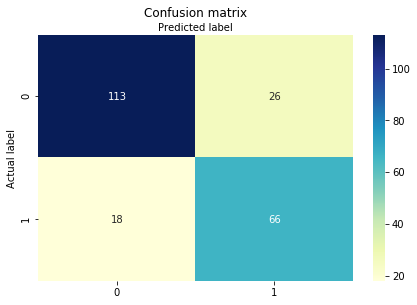

In [81]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [82]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8026905829596412
Precision: 0.717391304347826
Recall: 0.7857142857142857


In [83]:
# Generate and display different evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

0.8026905829596412
0.8654504967454606
[[113  26]
 [ 18  66]]
             precision    recall  f1-score   support

          0       0.86      0.81      0.84       139
          1       0.72      0.79      0.75        84

avg / total       0.81      0.80      0.80       223



# Running Decision Tree Classifier

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
import sklearn.model_selection as cv

In [85]:
x = X

In [86]:
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.20)

In [87]:
#Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=10, random_state=0)

# Fit dt to the training set
dt.fit(x_train, y_train)

# Predict test set labels
y_pred = dt.predict(x_test)
print(y_pred[0:5])

[0 0 1 1 1]


In [88]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(x_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.84


# Bagging Classifier Model

In [89]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1
# Split data into train and test
X_train, X_test, y_train, y_test = \
train_test_split(X, y,
test_size=0.2,
stratify=y,
random_state=SEED)

C:\Users\John\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [90]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16,
random_state=SEED)
# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300,
n_jobs=-1)
# Fit 'bc' to the training set
bc.fit(X_train, y_train)
# Predict test set labels
y_pred = bc.predict(X_test)
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))


Accuracy of Bagging Classifier: 0.804


# Running Random Forest Classifier

In [182]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [183]:
#Random Forest for Titanic:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print("Test set accuracy: {:.2f}".format(acc_random_forest))

Test set accuracy: 92.22


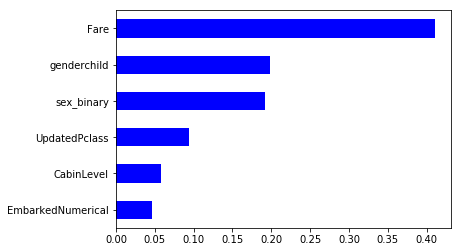

In [184]:
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_random_forest = pd.Series(random_forest.feature_importances_,
index = X.columns)
# Sort importances_rf
sorted_importances_random_forest = importances_random_forest.sort_values()
# Make a horizontal bar plot
sorted_importances_random_forest.plot(kind='barh', color='blue')
plt.show()

Running the model without some of the low values of isalone, ischild, embarkednumerical, and cabinlevel

In [185]:
feature_cols = ['Fare','CabinLevel','UpdatedPclass','sex_binary','EmbarkedNumerical','genderchild']
X = titanic_data[feature_cols]
y = titanic_data.Survived

In [186]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [187]:
#Random Forest for Titanic:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print("Test set accuracy: {:.2f}".format(acc_random_forest))

Test set accuracy: 92.37


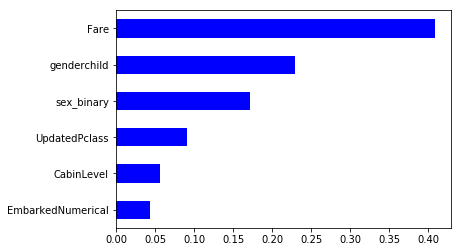

In [188]:
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_random_forest = pd.Series(random_forest.feature_importances_,
index = X.columns)
# Sort importances_rf
sorted_importances_random_forest = importances_random_forest.sort_values()
# Make a horizontal bar plot
sorted_importances_random_forest.plot(kind='barh', color='blue')
plt.show()

In [190]:
from sklearn.metrics import mean_squared_error as MSE

# Compute mse_dt
mse_dt = MSE(y_test, Y_prediction)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.39


In [191]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(random_forest, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 0.45


In [192]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
random_forest.fit(x_train, y_train)

# Predict the labels of the training set
y_pred_train = random_forest.predict(x_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 0.28


Overfitting as evidenced by the CV being higher than the train, going to decrease model complexity of RF. 

In [235]:
#Random Forest for Titanic:
random_forest = RandomForestClassifier(n_estimators=500, min_samples_leaf=5,  random_state=0)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print("Test set accuracy: {:.2f}".format(acc_random_forest))

Test set accuracy: 84.28


In [236]:
from sklearn.metrics import mean_squared_error as MSE

# Compute mse_dt
mse_dt = MSE(y_test, Y_prediction)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.42


In [237]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(random_forest, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 0.44


In [238]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
random_forest.fit(x_train, y_train)

# Predict the labels of the training set
y_pred_train = random_forest.predict(x_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 0.40


For this type of problem, I chose the classifier models. Despite a lot of feature engineering that I did, the accuracy score for the logistic regression and decision tree did not increase very much at all. I did try to combine two features (sex and child/adult) to create an interaction term but it didn't seem to have too much impact. An interesting pice of the random forest is that it show that Fare is the biggest predictor for survival, followed by the combination of gender and child/adult. It is possible the logistic regression would have performed better if I did more interaction terms.  The random forest in my instance definitely has some overfitting issues but unfortunately once I got CV = train, it performed on par with logistic regression and the decision tree. In doing some of the analysis, however, it does appear that the holdout set is fairly similar to the original dataset.  My thinking is that some overfitting may not be bad if the dataset you're looking to predict is similar to the original (may be wrong here), thus I'm going with the slightly overfitted random forrest model (with 84.28% accuracy).

# Running the Random Forest on the holdout set

In [176]:
titanic_holdout.shape

(418, 11)

In [246]:
titanic_holdout.head()

,PassengerId,Fare,CabinLevel,UpdatedPclass,sex_binary,IsChild,IsAlone,EmbarkedNumerical,genderchild
0,892,7.8292,3,3,0,0,1,1,1
1,893,7.0000,3,3,1,0,0,2,3
2,894,9.6875,3,2,0,0,1,1,1
3,895,8.6625,3,3,0,0,1,2,1
4,896,12.2875,3,3,1,0,0,2,3


In [244]:
titanic_data.head()

,Survived,Fare,CabinLevel,UpdatedPclass,sex_binary,IsChild,IsAlone,EmbarkedNumerical,genderchild
0,0,7.2500,3,3,0,0,0,2,1
1,1,71.2833,1,1,1,0,0,0,3
2,1,7.9250,3,3,1,0,1,2,3
3,1,53.1000,1,1,1,0,0,2,3
4,0,8.0500,3,3,0,0,1,2,1


In [247]:
X_Holdout = titanic_holdout.iloc[:,1:12]

(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.30)

#Reload the model:

random_forest = RandomForestClassifier(n_estimators=500, min_samples_leaf=5,  random_state=0)
random_forest.fit(x_train, y_train)

# Getting Holdout predictions:
Holdout_predictions = random_forest.predict(X_Holdout)


Holdout_predictions

FinalHoldout = pd.DataFrame(Holdout_predictions)


In [248]:
FinalHoldout.columns = ['predictions']

In [249]:
FinalHoldout['PassengerId'] = titanic_holdout.PassengerId

In [250]:
FinalHoldout.to_csv('Flowers,John_TitanicPredictions.csv', sep=',', index = False)